In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px


mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [4]:
def parse(x):
	return datetime.strptime(x, '%m/%d/%Y')

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv', parse_dates = ['Quarter'],date_parser=parse)
df.head()

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


In [6]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  61
Columns  :  3

Features : 
 ['Quarter', 'Revenue', 'Net Income']

Missing values :   Quarter       False
Revenue       False
Net Income    False
dtype: bool

Unique values :  
 Quarter       61
Revenue       61
Net Income    57
dtype: int64


In [7]:
amazon_df=df.set_index("Quarter")

In [8]:
fig = px.line(df, x='Quarter', y='Revenue', title='Amazon Revenue Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

## KPSS test for checking stationarity of the TS

Null Hypothesis: Data is stationary

Alternate Hypothesis: Data is not stationary

In [9]:
from statsmodels.tsa.stattools import kpss

In [11]:
tstest = kpss(amazon_df['Revenue'], 'ct')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'



In [12]:
tstest
# test statistics
# P-value: < 0.05; Null hypothesis is rejected

(0.170051682108309,
 0.029956931576409152,
 11,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

Additive: yt = Tt+ Ct+St + It

T: Trend
C: Cyclic
S: Seasonality
I: Noise
y: observed

Multiplicative: yt = Tt \* Ct\*St \* It

Use additive where magnitude dont vary with respect to time

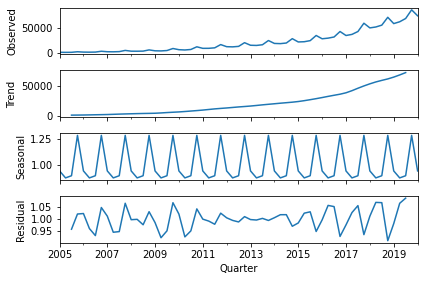

In [16]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(amazon_df['Revenue'], model='multiplicative')

resplit = res.plot()

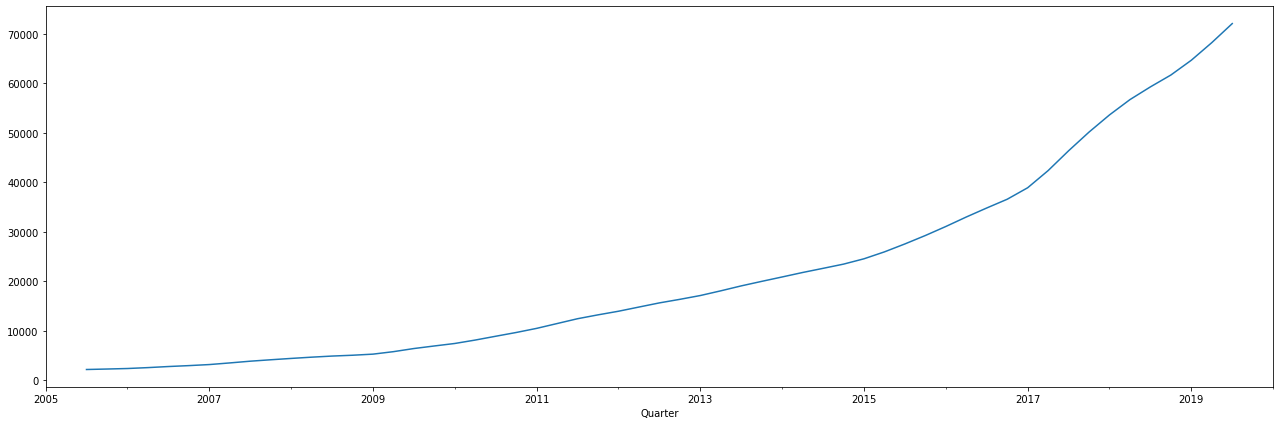

In [17]:
plt.figure(figsize=(22,7))

res.trend.plot()

In [18]:
res.observed

Quarter
2020-03-31    75452
2019-12-31    87437
2019-09-30    69981
2019-06-30    63404
2019-03-31    59700
              ...  
2006-03-31     2279
2005-12-31     2977
2005-09-30     1858
2005-06-30     1753
2005-03-31     1902
Name: Revenue, Length: 61, dtype: int64

In [19]:
print(res.seasonal)

Quarter
2020-03-31    0.941840
2019-12-31    1.289518
2019-09-30    0.894993
2019-06-30    0.873649
2019-03-31    0.941840
                ...   
2006-03-31    0.941840
2005-12-31    1.289518
2005-09-30    0.894993
2005-06-30    0.873649
2005-03-31    0.941840
Name: Revenue, Length: 61, dtype: float64


In [20]:
res.resid

Quarter
2020-03-31         NaN
2019-12-31         NaN
2019-09-30    1.084496
2019-06-30    1.063372
2019-03-31    0.979831
                ...   
2006-03-31    1.021253
2005-12-31    1.019256
2005-09-30    0.956844
2005-06-30         NaN
2005-03-31         NaN
Name: Revenue, Length: 61, dtype: float64

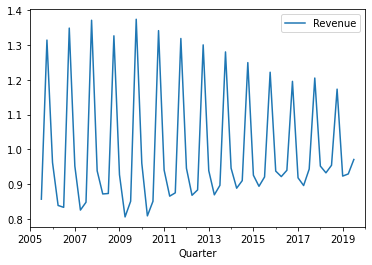

In [22]:
pd.DataFrame(res.observed/res.trend).plot()

## Python Time Series Functions

In [24]:
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import date

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [25]:
coindeskURL = 'https://api.coindesk.com/v1/bpi/historical/close.json?'

start = date(2017, 1,1)
end= date(2020,7,2)

url = f'{coindeskURL}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}'

result = requests.get(url)
result.content

b'{"bpi":{"2017-01-01":997.6888,"2017-01-02":1018.05,"2017-01-03":1030.8175,"2017-01-04":1129.87,"2017-01-05":1005.815,"2017-01-06":895.67,"2017-01-07":905.17,"2017-01-08":913.5238,"2017-01-09":899.35,"2017-01-10":904.7925,"2017-01-11":775.9813,"2017-01-12":802.8288,"2017-01-13":826.1213,"2017-01-14":818.6388,"2017-01-15":822.4225,"2017-01-16":830.2638,"2017-01-17":904.4538,"2017-01-18":884.2513,"2017-01-19":898.0213,"2017-01-20":891.6238,"2017-01-21":920.0113,"2017-01-22":925.3313,"2017-01-23":912.6875,"2017-01-24":885.6475,"2017-01-25":894.11,"2017-01-26":915.1,"2017-01-27":918.5625,"2017-01-28":920.28,"2017-01-29":914.0438,"2017-01-30":920.2413,"2017-01-31":967.6675,"2017-02-01":987.3463,"2017-02-02":1007.795,"2017-02-03":1018.1113,"2017-02-04":1033.6525,"2017-02-05":1013.9938,"2017-02-06":1024.6125,"2017-02-07":1052.5388,"2017-02-08":1054.3438,"2017-02-09":988.9475,"2017-02-10":993.0788,"2017-02-11":1010.0025,"2017-02-12":999.5125,"2017-02-13":996.8575,"2017-02-14":1009.2513,"2017-

In [27]:
data = pd.read_json(result.content).iloc[:-2,:1]
data.index.name='date'
data.index = pd.to_datetime(data.index)
data

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150
...,...
2020-06-28,8991.5000
2020-06-29,9096.1500
2020-06-30,9144.3850


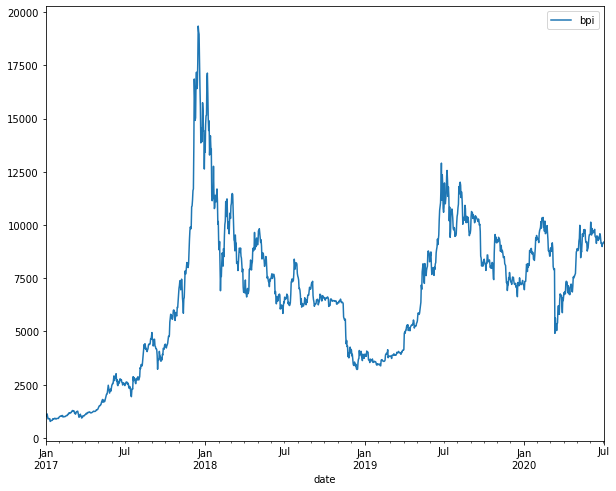

In [28]:
data.plot()

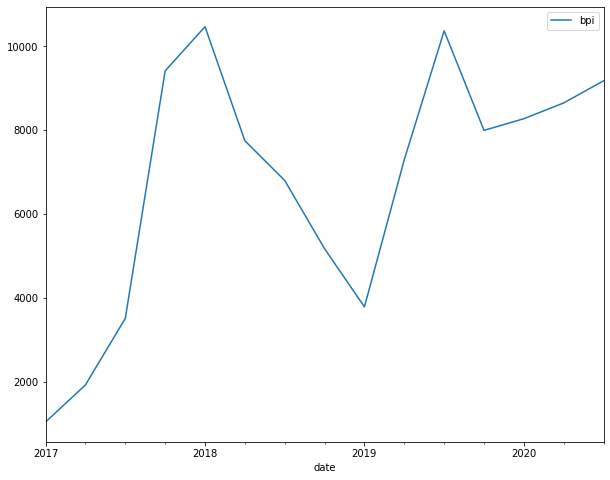

In [33]:
data.resample('Q').mean().plot()

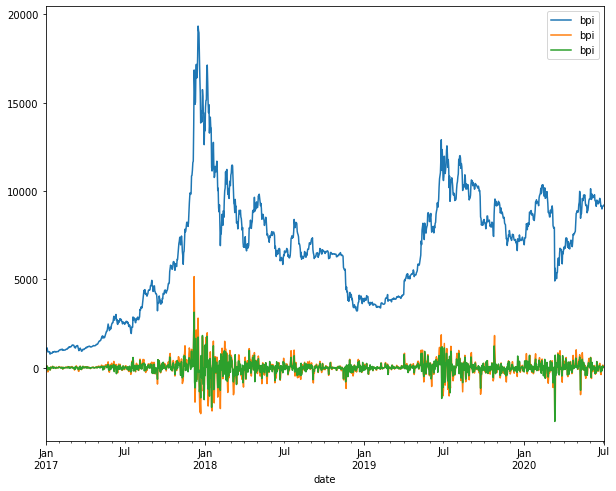

In [36]:
pd.concat([data['bpi'], data['bpi'].diff(2), data['bpi'].diff()], axis=1).plot()

In [37]:
data.shift(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,997.6888
2017-01-04,1018.0500
2017-01-05,1030.8175
...,...
2020-06-28,9127.5500
2020-06-29,9164.3150
2020-06-30,8991.5000


In [38]:
data.tshift(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

tshift is deprecated and will be removed in a future version. Please use shift instead.



,bpi
date,
2017-01-03,997.6888
2017-01-04,1018.0500
2017-01-05,1030.8175
2017-01-06,1129.8700
2017-01-07,1005.8150
...,...
2020-06-30,8991.5000
2020-07-01,9096.1500
2020-07-02,9144.3850


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

tshift is deprecated and will be removed in a future version. Please use shift instead.



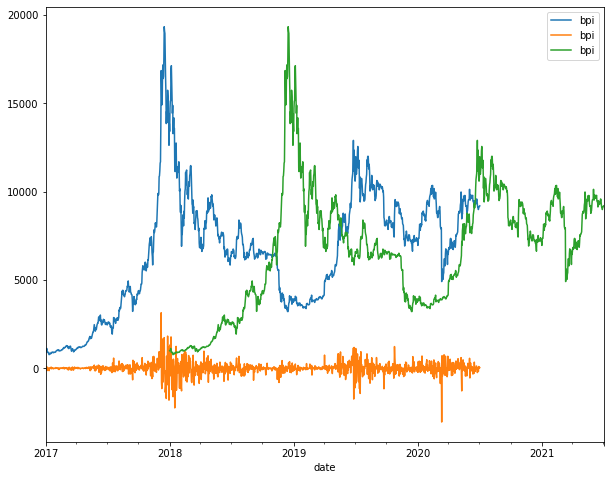

In [40]:
pd.concat([data, data - data.shift(), data.tshift(365)], axis=1).plot()

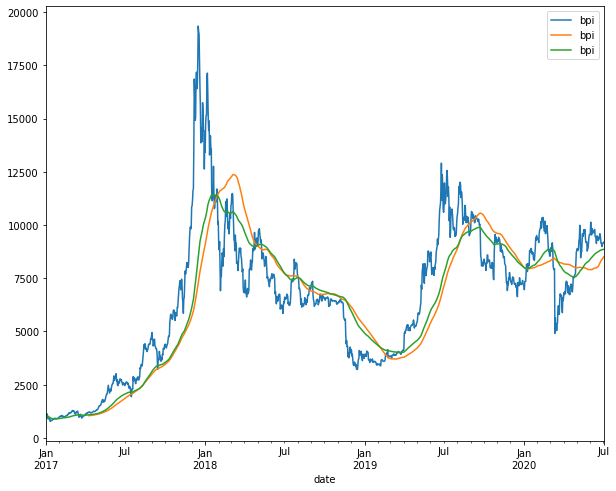

In [41]:
pd.concat([data, data.rolling(window=100).mean(), data.ewm(span=100).mean()], axis=1).plot()